# Download data

In [1]:
import os
CURR_PATH = os.getcwd()
DATA_PATH = os.path.join(CURR_PATH, "datasets")
TRAIN_DATA_FILE = "train.csv"
TEST_DATA_FILE = "test.csv"

# A quick look at data

In [2]:
import pandas as pd
train_data = pd.read_csv(os.path.join(DATA_PATH, TRAIN_DATA_FILE))
train_data.head()
# train_data.info()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
train_data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# train_data.hist(bins=50, figsize=(20, 15))

# Unstratified sampling
1. Large amount of samples => less sampling bias
2. Inplicit feature names

In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_data, test_size=0.2, random_state=42)

In [6]:
train_set.shape, test_set.shape

((476169, 59), (119043, 59))

# EDA

In [7]:
ps_train = train_set.copy()

In [8]:
def feature_classifier(feature_name):
    name_ending = feature_name.split('_')[-1]
    try:
        int(name_ending)
        return 'num'
    except ValueError:
        return name_ending 

In [9]:
import pandas
ps_train_cont = pandas.DataFrame()
ps_train_cat = pandas.DataFrame()
for column in ps_train.columns[2:]:
    if feature_classifier(column) == 'num':
        ps_train_cont[column] = ps_train[column]
    else:
        ps_train_cat[column] = ps_train[column]

In [10]:
corr_matrix = ps_train_cont.corr()

In [11]:
new_df = corr_matrix.replace(1, 0)
new_df.max()

ps_ind_01     0.222793
ps_ind_03     0.222793
ps_ind_14     0.021302
ps_ind_15     0.172173
ps_reg_01     0.637167
ps_reg_02     0.516899
ps_reg_03     0.637167
ps_car_11     0.109689
ps_car_12     0.672164
ps_car_13     0.672164
ps_car_14     0.034806
ps_car_15     0.529814
ps_calc_01    0.002994
ps_calc_02    0.002170
ps_calc_03    0.003065
ps_calc_04    0.002994
ps_calc_05    0.002081
ps_calc_06    0.003588
ps_calc_07    0.003065
ps_calc_08    0.003735
ps_calc_09    0.002146
ps_calc_10    0.002093
ps_calc_11    0.004328
ps_calc_12    0.002440
ps_calc_13    0.004328
ps_calc_14    0.002093
dtype: float64

In [12]:
new_df['ps_car_12']

ps_ind_01     0.163240
ps_ind_03     0.088352
ps_ind_14     0.018643
ps_ind_15    -0.027629
ps_reg_01     0.019405
ps_reg_02     0.172470
ps_reg_03     0.082938
ps_car_11     0.056917
ps_car_12     0.000000
ps_car_13     0.672164
ps_car_14     0.012614
ps_car_15     0.049963
ps_calc_01   -0.000934
ps_calc_02   -0.000214
ps_calc_03   -0.001296
ps_calc_04   -0.000057
ps_calc_05    0.000633
ps_calc_06    0.001676
ps_calc_07    0.000095
ps_calc_08   -0.000440
ps_calc_09    0.000598
ps_calc_10    0.000517
ps_calc_11   -0.001095
ps_calc_12    0.000836
ps_calc_13    0.000363
ps_calc_14   -0.000334
Name: ps_car_12, dtype: float64

(0, 1)

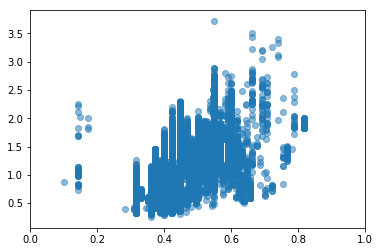

In [13]:
plt.scatter(ps_train_cont['ps_car_12'], ps_train_cont['ps_car_13'], alpha=0.5)
plt.xlim([0, 1])

'ps_car_12' and 'ps_car_13' have the strongest correlation among all features. But still not strong enough to be combined into one.

In [14]:
ps_train_cont['target'] = ps_train['target']
ps_train_cat['target'] = ps_train['target']

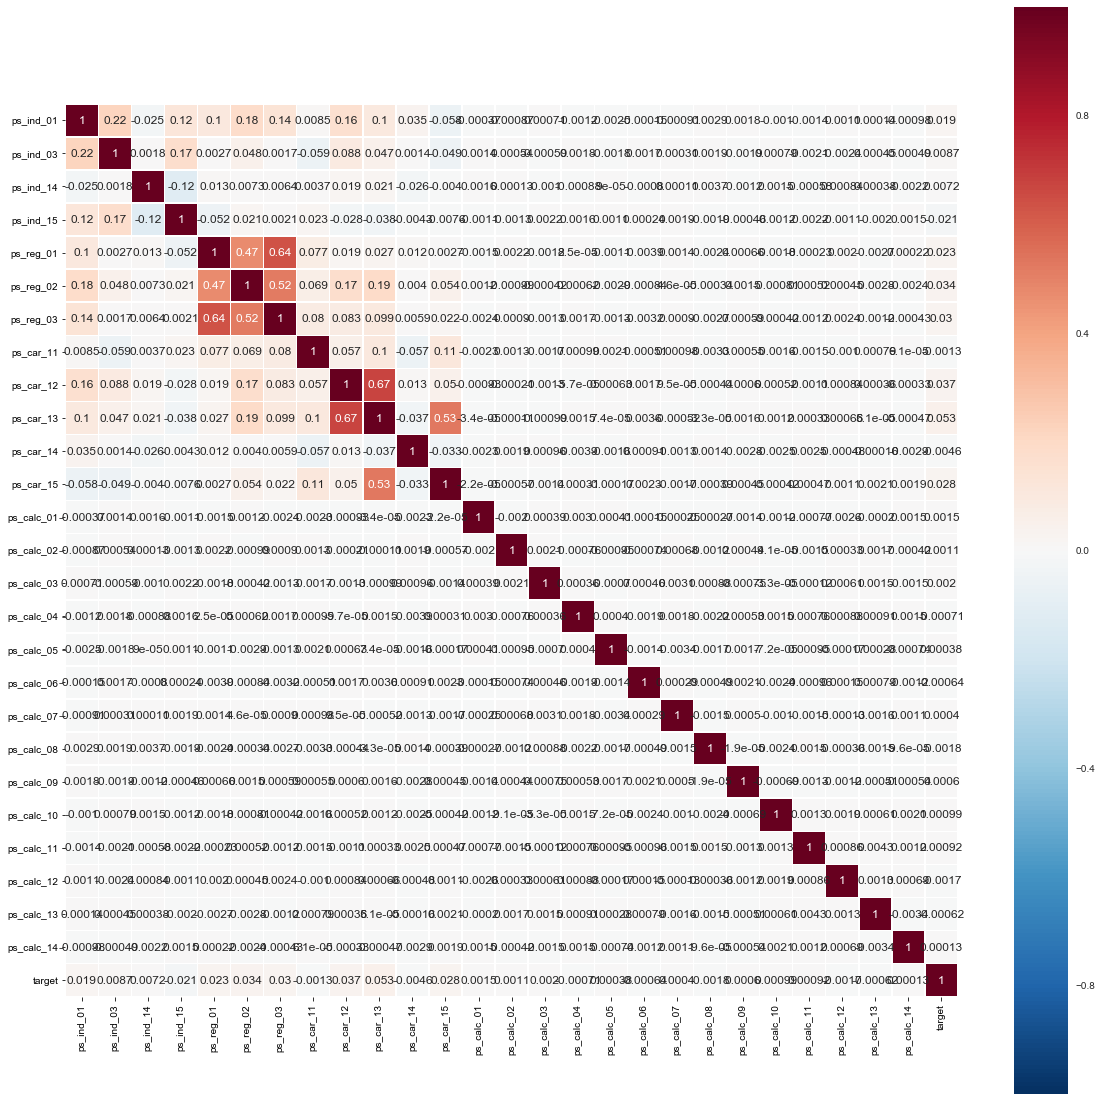

In [15]:
corr_matrix = ps_train_cont.corr()
f, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation='90')
import seaborn
seaborn.heatmap(corr_matrix, square=True, linewidths=.5, annot=True)

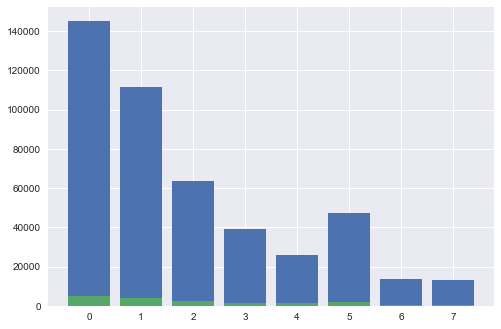

In [16]:
from utilities.plot import hist_with_target, hist_ratio_with_target
hist_with_target(ps_train_cont, 'ps_ind_01', 'target')

0.0     0.033613
1.0     0.036107
2.0     0.036758
3.0     0.034010
4.0     0.036261
5.0     0.037866
6.0     0.036179
7.0     0.036188
8.0     0.035895
9.0     0.036955
10.0    0.036049
11.0    0.036670
12.0    0.035066
13.0    0.035645
14.0    0.040273
15.0    0.035448
16.0    0.039394
17.0    0.035775
18.0    0.020661
19.0    0.050505
20.0    0.025641
21.0         NaN
22.0         NaN
23.0         NaN
Name: feature_cat, dtype: float64

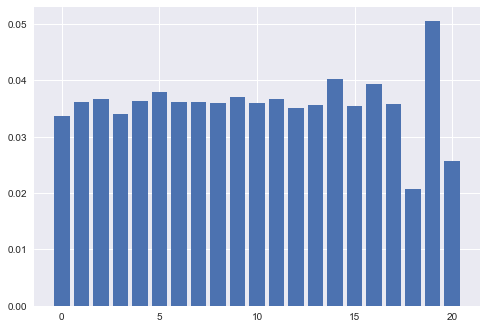

In [17]:
hist_ratio_with_target(ps_train, 'ps_calc_14', 'target')

# Skipping attribute combination / feature engineering for now

# Prepare the data for ML

In [18]:
ps_train = train_set.drop('target', axis=1)
ps_label = train_set['target'].copy()

In [19]:
import numpy as np
ps_train.replace(-1, np.nan, inplace=True)
ps_train_nn = ps_train.dropna(axis=0)
ps_train.shape, ps_train_nn.shape

((476169, 58), (99962, 58))

Some column contains too much NaN..

In [20]:
ps_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476169 entries, 39028 to 121958
Data columns (total 58 columns):
id                476169 non-null int64
ps_ind_01         476169 non-null int64
ps_ind_02_cat     476006 non-null float64
ps_ind_03         476169 non-null int64
ps_ind_04_cat     476103 non-null float64
ps_ind_05_cat     471532 non-null float64
ps_ind_06_bin     476169 non-null int64
ps_ind_07_bin     476169 non-null int64
ps_ind_08_bin     476169 non-null int64
ps_ind_09_bin     476169 non-null int64
ps_ind_10_bin     476169 non-null int64
ps_ind_11_bin     476169 non-null int64
ps_ind_12_bin     476169 non-null int64
ps_ind_13_bin     476169 non-null int64
ps_ind_14         476169 non-null int64
ps_ind_15         476169 non-null int64
ps_ind_16_bin     476169 non-null int64
ps_ind_17_bin     476169 non-null int64
ps_ind_18_bin     476169 non-null int64
ps_reg_01         476169 non-null float64
ps_reg_02         476169 non-null float64
ps_reg_03         390086 non-null f

In [21]:
from sklearn.preprocessing import Imputer, StandardScaler
num_imputer = Imputer(strategy="median")
cat_imputer = Imputer(strategy="most_frequent")

In [22]:
columns = {'num':[], 'bin':[], 'cat':[]}

for column in ps_train.columns[1:]:
    feat_cls = feature_classifier(column)
    columns[feat_cls].append(column)

In [23]:
ps_train_cat = ps_train[columns['cat']]
ps_train_cat_iptd = pandas.DataFrame(cat_imputer.fit_transform(ps_train_cat), columns=columns['cat'])
ps_train_cat_iptd.describe()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
count,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000
mean,1.359414,0.416673,0.415544,8.296729,0.830474,0.877069,0.724545,0.738166,6.553119,0.948871,0.832614,1.332731,0.992133,62.216581
std,0.662437,0.493008,1.345156,2.505109,0.375216,0.328358,2.152783,0.439633,5.500296,0.220261,0.373320,0.976277,0.091728,33.005739
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000
50%,1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000
75%,2.000000,1.000000,0.000000,11.000000,1.000000,1.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000
max,4.000000,1.000000,6.000000,11.000000,1.000000,1.000000,9.000000,1.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000


In [24]:
ps_train_bin = ps_train[columns['bin']]
ps_train_bin_iptd = pandas.DataFrame(cat_imputer.fit_transform(ps_train_bin), columns=columns['bin'])
ps_train_bin_iptd.describe()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000
mean,0.393795,0.256755,0.164110,0.185340,0.000374,0.001688,0.009343,0.000916,0.660570,0.121301,0.153519,0.122423,0.627857,0.554141,0.287207,0.348584,0.153393
std,0.488591,0.436844,0.370376,0.388573,0.019331,0.041056,0.096208,0.030246,0.473516,0.326478,0.360487,0.327774,0.483377,0.497061,0.452459,0.476523,0.360366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
ps_train_num = ps_train[columns['num']]
ps_train_num_iptd = pandas.DataFrame(num_imputer.fit_transform(ps_train_num), columns=columns['num'])
ps_train_num_iptd.describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,...,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000
mean,1.901004,4.423929,0.012321,7.299026,0.611008,0.439366,0.877441,2.345984,0.379886,0.812921,...,1.885935,7.691024,3.005349,9.226027,2.337996,8.433002,5.440890,1.441929,2.871985,7.539964
std,1.984243,2.700678,0.127104,3.546075,0.287482,0.404367,0.314370,0.832641,0.058221,0.224257,...,1.135695,1.334917,1.414745,1.459524,1.247195,2.904316,2.332966,1.202766,1.694820,2.745810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061237,0.000000,0.100000,0.250619,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,0.400000,0.200000,0.666615,2.000000,0.316228,0.670617,...,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,0.700000,0.300000,0.801951,3.000000,0.374166,0.765582,...,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,0.900000,0.600000,1.000625,3.000000,0.400000,0.905755,...,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,0.900000,1.800000,4.037945,3.000000,1.264911,3.720626,...,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


In [26]:
std_scaler = StandardScaler()
ps_train_num_scld = pandas.DataFrame(std_scaler.fit_transform(ps_train_num_iptd), columns=columns['num'])
ps_train_num_scld.describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,4.761690e+05,4.761690e+05,4.761690e+05,4.761690e+05,4.761690e+05,4.761690e+05,4.761690e+05,4.761690e+05,4.761690e+05,4.761690e+05,...,4.761690e+05,4.761690e+05,4.761690e+05,4.761690e+05,4.761690e+05,4.761690e+05,4.761690e+05,4.761690e+05,4.761690e+05,4.761690e+05
mean,5.177958e-17,-1.518992e-16,-4.655686e-18,9.529234e-17,-3.637199e-16,-1.260915e-17,-5.119650e-16,2.536677e-16,-1.659095e-15,-1.411926e-15,...,-5.118270e-18,-1.202719e-16,1.526677e-16,5.797784e-17,5.709930e-17,2.960837e-16,2.033580e-16,1.671272e-18,-2.303222e-17,1.116917e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-9.580508e-01,-1.638083e+00,-9.693839e-02,-2.058342e+00,-2.125384e+00,-1.086554e+00,-2.596321e+00,-2.817524e+00,-4.807267e+00,-2.507403e+00,...,-1.660602e+00,-5.761431e+00,-2.124307e+00,-4.950952e+00,-1.874605e+00,-2.903614e+00,-2.332179e+00,-1.198846e+00,-1.694568e+00,-2.745992e+00
25%,-9.580508e-01,-8.975271e-01,-9.693839e-02,-6.483306e-01,-7.339895e-01,-5.919532e-01,-6.706328e-01,-4.155267e-01,-1.093380e+00,-6.345588e-01,...,-7.800832e-01,-5.176534e-01,-7.106229e-01,-8.400190e-01,-1.072805e+00,-8.377203e-01,-6.176220e-01,-3.674278e-01,-5.145004e-01,-5.608419e-01
50%,-4.540797e-01,-1.569716e-01,-9.693839e-02,-8.432606e-02,3.095565e-01,-3.446530e-01,-2.401323e-01,7.854721e-01,-9.824849e-02,-2.110940e-01,...,1.004360e-01,2.314577e-01,-3.780857e-03,-1.548636e-01,-2.710049e-01,-1.490892e-01,-1.889827e-01,-3.674278e-01,7.553347e-02,-1.966503e-01
75%,5.538623e-01,5.835839e-01,-9.693839e-02,7.616807e-01,1.005254e+00,3.972475e-01,3.918443e-01,7.854721e-01,3.454759e-01,4.139631e-01,...,9.809552e-01,9.805688e-01,7.030612e-01,5.302919e-01,5.307953e-01,5.395419e-01,6.682960e-01,4.639900e-01,6.655673e-01,5.317330e-01
max,2.569747e+00,2.434973e+00,3.137336e+01,1.607688e+00,1.005254e+00,3.364850e+00,1.005347e+01,7.854721e-01,1.520102e+01,1.296596e+01,...,3.622513e+00,1.729680e+00,4.237272e+00,1.900603e+00,3.737996e+00,5.704275e+00,5.811968e+00,7.115333e+00,5.975872e+00,5.630416e+00


In [27]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [28]:
cat_encoder = CategoricalEncoder()
ps_train_cat_1hot = cat_encoder.fit_transform(ps_train_cat_iptd)

# Transformation pipelines

In [29]:
from sklearn.pipeline import Pipeline

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
num_attribs = columns['num']
cat_attribs = columns['cat'] + columns['bin']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('imputer', Imputer(strategy="most_frequent")),
    ('cat_encoder', CategoricalEncoder()),
])

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

ps_train_prepared = full_pipeline.fit_transform(ps_train)

In [30]:
ps_train_prepared.shape

(476169, 235)

# Model trials
Considering the sample size and number of features, first try SGD Classifier.

In [31]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss="log", penalty="l2")
from sklearn.model_selection import cross_val_predict
ps_pred_svc = cross_val_predict(sgd_clf, ps_train_prepared, ps_label, cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(ps_label, ps_pred_svc)

C:\Users\Wu\.edm\envs\mle\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([[458860,      0],
       [ 17309,      0]], dtype=int64)

In [32]:
ps_label.value_counts()

0    458860
1     17309
Name: target, dtype: int64

The target values are highly imbalanced. Need to resample the samples with target 0.

In [33]:
together = np.concatenate([ps_label[:, None], ps_train_prepared.toarray()], axis=1)

idx_0 = (together[:, 0] == 0)
idx_1 = (together[:, 0] == 1)

from sklearn.utils import resample
together0 = together[idx_0]
together1 = together[idx_1]
together0_rs = resample(together0, n_samples=together0.shape[0]/10, random_state=42)

together_recomb = np.concatenate([together0_rs, together1], axis=0)
from sklearn.utils import shuffle
together_sf = shuffle(together_recomb, random_state=42)

In [34]:
sgd_clf = SGDClassifier(loss="hinge", penalty="l2")
ps_train_ds = together_sf[:, 1:]
ps_label_ds = together_sf[:, 0]
ps_pred_sgd = cross_val_predict(sgd_clf, ps_train_ds, ps_label_ds, cv=3)
confusion_matrix(ps_label_ds, ps_pred_sgd)

array([[36293,  9593],
       [12917,  4392]], dtype=int64)

In [35]:
# Compute gini

# from CPMP's kernel https://www.kaggle.com/cpmpml/extremely-fast-gini-computation

def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

In [36]:
eval_gini(ps_label_ds, ps_pred_sgd)

0.035322752140649949

In [37]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(loss="squared_loss", penalty="l2")
ps_pred_sgd = cross_val_predict(sgd_reg, ps_train_ds, ps_label_ds, cv=3)
eval_gini(ps_label_ds, ps_pred_sgd)

C:\Users\Wu\.edm\envs\mle\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.20509304398920225

In [38]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(loss="squared_loss", penalty="l1")
ps_pred_sgd = cross_val_predict(sgd_reg, ps_train_ds, ps_label_ds, cv=3)
eval_gini(ps_label_ds, ps_pred_sgd)

0.23475495605819907

In [39]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(loss="huber", penalty="l2")
ps_pred_sgd = cross_val_predict(sgd_reg, ps_train_ds, ps_label_ds, cv=3)
eval_gini(ps_label_ds, ps_pred_sgd)

0.22342075578204956

In [40]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(loss="huber", penalty="l1")
ps_pred_sgd = cross_val_predict(sgd_reg, ps_train_ds, ps_label_ds, cv=3)
eval_gini(ps_label_ds, ps_pred_sgd)

0.24015916614223087

In [41]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(loss="epsilon_insensitive", penalty="l2")
ps_pred_sgd = cross_val_predict(sgd_reg, ps_train_ds, ps_label_ds, cv=3)
eval_gini(ps_label_ds, ps_pred_sgd)

0.12653336530919523

# Evaluate on the test set

In [42]:
ps_train = train_set.drop('target', axis=1)
ps_train_label = train_set['target'].copy()
ps_train.replace(-1, np.nan, inplace=True)

ps_test = test_set.drop('target', axis=1)
ps_test_label = test_set['target'].copy()
ps_test.replace(-1, np.nan, inplace=True)

In [43]:
ps_train_prepared = full_pipeline.transform(ps_train)
ps_test_prepared = full_pipeline.transform(ps_test)

In [44]:
print ps_train_prepared.shape, ps_test_prepared.shape

(476169, 235) (119043, 235)


In [45]:
together = np.concatenate([ps_train_label[:, None], ps_train_prepared.toarray()], axis=1)

idx_0 = (together[:, 0] == 0)
idx_1 = (together[:, 0] == 1)

together0 = together[idx_0]
together1 = together[idx_1]
together0_rs = resample(together0, n_samples=together0.shape[0]/10, random_state=42)

together_recomb = np.concatenate([together0_rs, together1], axis=0)
together_sf = shuffle(together_recomb, random_state=42)

In [48]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
 
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

In [58]:
ps_train_ds = together_sf[:, 1:]
ps_train_label_ds = together_sf[:, 0]
sgd_reg = SGDRegressor(loss="huber", penalty="l1")
ps_pred_sgd = cross_val_predict(sgd_reg, ps_train_ds, ps_train_label_ds, cv=3)
gini_normalized(ps_train_label_ds, ps_pred_sgd)

0.23246302134571609

In [57]:
sgd_reg = SGDRegressor(loss="huber", penalty="l1")
sgd_reg.fit(ps_train_ds, ps_train_label_ds)
final_pred = sgd_reg.predict(ps_test_prepared)
gini_normalized(ps_test_label, final_pred)

0.25350274843437537

# First submission

In [51]:
real_test_data = pd.read_csv(os.path.join(DATA_PATH, TEST_DATA_FILE))
real_test_data.replace(-1, np.nan, inplace=True)

In [52]:
real_test_prepared = full_pipeline.fit_transform(real_test_data)
real_test_prepared.shape

(892816, 235)

In [53]:
pred_submission = sgd_reg.predict(real_test_prepared)

In [54]:
prediction_df = pd.DataFrame()
prediction_df['id'] = real_test_data['id'].values
prediction_df['target'] = pred_submission
prediction_df.describe()

,id,target
count,8.928160e+05,892816.000000
mean,7.441535e+05,0.037048
std,4.296830e+05,0.016557
min,0.000000e+00,-0.006067
25%,3.720218e+05,0.025126
50%,7.443070e+05,0.034884
75%,1.116308e+06,0.046630
max,1.488026e+06,0.189566


In [55]:
prediction_df.loc[prediction_df['target'] > 1, 'target'] = 1
prediction_df.loc[prediction_df['target'] < 0, 'target'] = 0
prediction_df.describe()

,id,target
count,8.928160e+05,892816.000000
mean,7.441535e+05,0.037048
std,4.296830e+05,0.016556
min,0.000000e+00,0.000000
25%,3.720218e+05,0.025126
50%,7.443070e+05,0.034884
75%,1.116308e+06,0.046630
max,1.488026e+06,0.189566


In [56]:
PREDICTION_FILE = "prediction.csv"
prediction_df.to_csv(os.path.join(DATA_PATH, PREDICTION_FILE), index=False)